[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyGenomeViz/blob/main/notebooks/01_pygenomeviz_basic_usage.ipynb)

If you are using Colab, first install pygenomeviz with pip command. Then run `RESTART RUNTIME` if necessary to activate the newly installed packages.

In [1]:
# %pip install pygenomeviz

## Single Genome Track Visualization

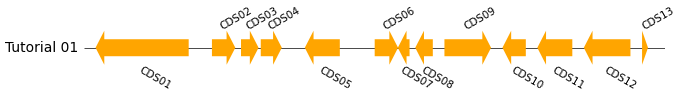

In [2]:
from pygenomeviz import GenomeViz

# Tutorial dataset (cds_list = start, end, strand)
name, genome_size = "Tutorial 01", 5000
cds_list = ((100, 900, -1), (1100, 1300, 1), (1350, 1500, 1), (1520, 1700, 1), (1900, 2200, -1), (2500, 2700, 1), (2700, 2800, -1), (2850, 3000, -1), (3100, 3500, 1), (3600, 3800, -1), (3900, 4200, -1), (4300, 4700, -1), (4800, 4850, 1))

gv = GenomeViz()
track = gv.add_feature_track(name, genome_size)
for idx, cds in enumerate(cds_list, 1):
    start, end, strand = cds
    track.add_feature(start, end, strand, label=f"CDS{idx:02d}")

fig = gv.plotfig(dpi=50)


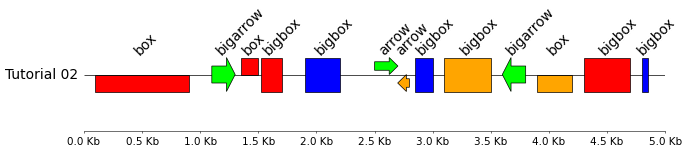

In [3]:
from pygenomeviz import GenomeViz
import random

random.seed(0)

name, genome_size = "Tutorial 02", 5000
cds_list = ((100, 900, -1), (1100, 1300, 1), (1350, 1500, 1), (1520, 1700, 1), (1900, 2200, -1), (2500, 2700, 1), (2700, 2800, -1), (2850, 3000, -1), (3100, 3500, 1), (3600, 3800, -1), (3900, 4200, -1), (4300, 4700, -1), (4800, 4850, 1))

gv = GenomeViz(tick_style="axis")
track = gv.add_feature_track(name, genome_size)

plotstyles = ("bigarrow", "arrow", "bigbox", "box")
colors = ("orange", "blue", "lime", "red")
for idx, cds in enumerate(cds_list, 1):
    start, end, strand = cds
    # Random choice 'plotstyle' & 'color'
    plotstyle, color = random.choice(plotstyles), random.choice(colors)
    # User can setting various parameters of features to be plotted
    track.add_feature(
        start,
        end,
        strand,
        label=plotstyle,
        labelsize=20,
        facecolor=color,
        plotstyle=plotstyle,
        labelvpos="top",
        labelrotation=45,
        linewidth=1,
    )

fig = gv.plotfig(dpi=50)


## Multiple Genome Track & Link Visualization

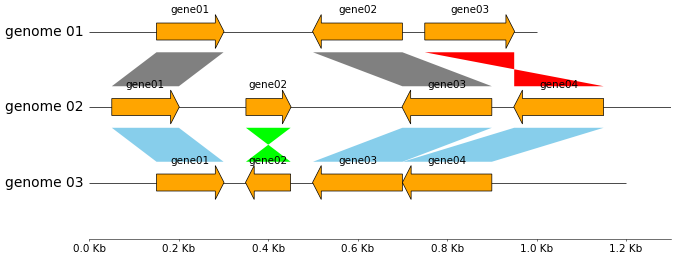

In [4]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(tick_style="axis")
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(
            start,
            end,
            strand,
            label=f"gene{idx:02d}",
            linewidth=1,
            labelrotation=0,
            labelvpos="top",
            labelhpos="center",
            labelha="center",
        )

# Add links between "genome 01" and "genome 02"
gv.add_link(("genome 01", 150, 300), ("genome 02", 50, 200))
gv.add_link(("genome 01", 700, 500), ("genome 02", 900, 700))
gv.add_link(("genome 01", 750, 950), ("genome 02", 1150, 950))
# Add links between "genome 02" and "genome 03"
gv.add_link(("genome 02", 50, 200), ("genome 03", 150, 300), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 02", 350, 450), ("genome 03", 450, 350), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 02", 900, 700), ("genome 03", 700, 500), normal_color="skyblue", inverted_color="lime")
gv.add_link(("genome 03", 900, 701), ("genome 02", 1150, 950), normal_color="skyblue", inverted_color="lime")

fig = gv.plotfig(dpi=50)


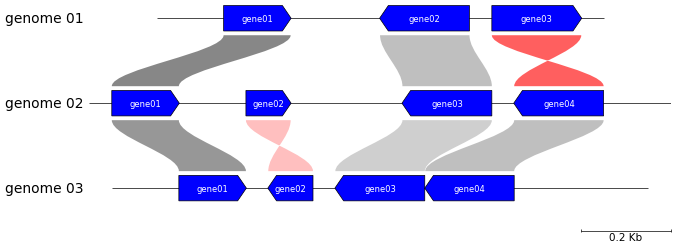

In [5]:
from pygenomeviz import GenomeViz

genome_list = (
    {"name": "genome 01", "size": 1000, "cds_list": ((150, 300, 1), (500, 700, -1), (750, 950, 1))},
    {"name": "genome 02", "size": 1300, "cds_list": ((50, 200, 1), (350, 450, 1), (700, 900, -1), (950, 1150, -1))},
    {"name": "genome 03", "size": 1200, "cds_list": ((150, 300, 1), (350, 450, -1), (500, 700, -1), (701, 900, -1))},
)

gv = GenomeViz(
    fig_track_height=1.0,
    feature_track_ratio=0.5,
    link_track_ratio=1.0,
    tick_track_ratio=0.5,
    arrow_shaft_ratio=1.0,
    tick_style="bar",
    align_type="center",
)
for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    for idx, cds in enumerate(cds_list, 1):
        start, end, strand = cds
        track.add_feature(
            start,
            end,
            strand,
            label=f"gene{idx:02d}",
            labelsize=12,
            labelcolor="white",
            facecolor="blue",
            linewidth=1,
            labelrotation=0,
            labelvpos="center",
            labelhpos="center",
            labelha="center",
        )

# Add links (link colors are interpolated by identity)
links = [
    # Links between "genome 01" and "genome 02"
    {"link1": ("genome 01", 150, 300), "link2": ("genome 02", 50, 200), "identity": 95},
    {"link1": ("genome 01", 700, 500), "link2": ("genome 02", 900, 700), "identity": 60},
    {"link1": ("genome 01", 750, 950), "link2": ("genome 02", 1150, 950), "identity": 70},
    # Links between "genome 02" and "genome 03"
    {"link1": ("genome 02", 50, 200), "link2": ("genome 03", 150, 300), "identity": 85},
    {"link1": ("genome 02", 350, 450), "link2": ("genome 03", 450, 350), "identity": 40},
    {"link1": ("genome 02", 900, 700), "link2": ("genome 03", 700, 500), "identity": 50},
    {"link1": ("genome 03", 900, 701), "link2": ("genome 02", 1150, 950), "identity": 60},
]
for link in links:
    link1, link2, identity = link["link1"], link["link2"], link["identity"]
    gv.add_link(link1, link2, interpolation_value=identity, vmin=20, vmax=100, curve=True)

fig = gv.plotfig(dpi=50)
